The objective of this project is to develop a simple linear regression model that can effectively predict the sales price of products based on the chosen feature. The model will be trained using historical data, and the company intends to use it to make price predictions for new products.

In [1]:
# importing some important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data and store in df variable
df=pd.read_csv('Sales_data.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Seeing top 5 records
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Checking the shape of data
df.shape

(200, 4)

In [5]:
# To find the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Let's look at some statistical information about our dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Finding the sum of missing values 'columnwise'
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Checking the sum of dublicate value in the data
df.duplicated().sum()

0

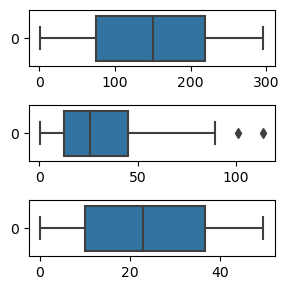

In [9]:
# checking Outliers
fig, axs = plt.subplots(3, figsize = (3,3))
# fig: This variable represents the entire figure (the entire plotting area) that contains all the subplots.
# axs: This is a NumPy array that holds references to the individual axes objects of each subplot.
plt1 = sns.boxplot(df['TV'], ax = axs[0],orient="h")
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1],orient="h")
plt3 = sns.boxplot(df['Radio'], ax = axs[2],orient="h")
plt.tight_layout()

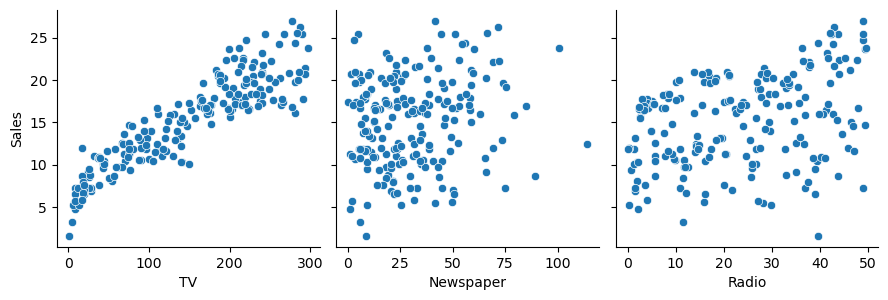

In [10]:
# To see the distibution of data we plot pairplot
sns.pairplot(df,x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=3,kind='scatter')
             

In [11]:
# Checking the co-relation of the data 
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

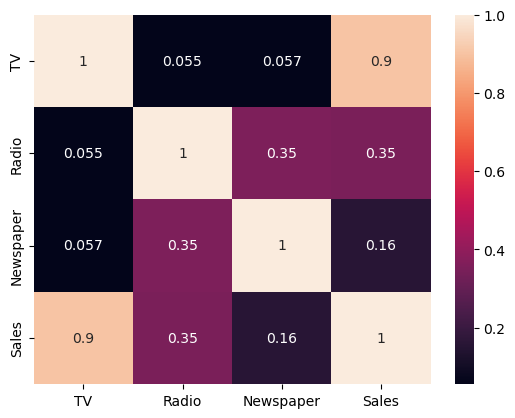

In [12]:
# Making heatmap to see co-relation between the variable
sns.heatmap(df.corr(),annot=True)

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [14]:
# Now dividing the data in x and y
x=df['TV'] # here we take only 1 column(TV) because only the tv column is co-related with sales so it have a high impact
print(x)
print()
y=df['Sales']
print(y)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


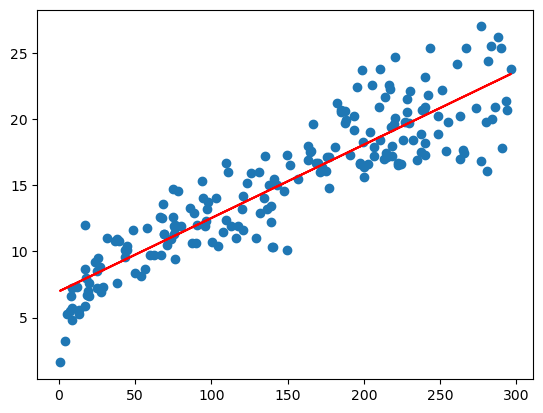

In [15]:
# To plot a linear Regression(Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(x,y)
m,b = np.polyfit(x,y,1)     
plt.plot(x,m*x + b, 'r')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [17]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/var/folders/5r/lvmylx6s7xl2d6q6h2j6j_d40000gn/T/ipykernel_13495/2733214152.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
/var/folders/5r/lvmylx6s7xl2d6q6h2j6j_d40000gn/T/ipykernel_13495/2733214152.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [18]:
# Assuming X_train and X_test are regular arrays/lists
X_train = np.array(X_train)
X_test = np.array(X_test)

In [19]:
# Fitting of model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
# Predicting the Salary for the Test values
Y_pred=lr.predict(X_test)
Y_pred

array([ 7.35315861, 19.89690095, 14.28923836, 18.78081277, 20.0874526 ,
       18.18738051, 14.50701166, 17.68650191, 18.71003644, 18.73181377,
       13.30925849, 19.42324402,  9.98821559, 17.15295731, 11.6759587 ,
       12.05706199, 15.07866659, 16.19475477, 15.82998449, 13.07515219,
       18.61748279, 13.97346707, 17.56672659, 16.56496939, 16.99507167,
       18.92236542, 18.89514375, 11.02808312, 16.99507167, 13.63047411,
       10.65242417, 10.68509017, 13.51614313, 17.18562331,  9.65066697,
       13.48892146, 12.22039196, 16.09675679, 19.0366964 , 17.44695128,
       18.65559312, 16.49419307, 15.88442782, 18.82436743, 13.47258847,
       11.81206702,  7.84859287, 20.47400021, 10.77219949,  9.00823572,
       17.95327421, 16.25464243, 11.01719446, 14.06602072, 18.39970948,
        9.35122868,  7.86492587,  8.32224981, 17.68650191, 11.59429371,
       18.54670646, 15.17666458, 18.08938253, 14.70845197, 14.24023937,
       11.29485542])

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
print('MSE: ', mean_squared_error(Y_test,Y_pred))
print('MAE: ', mean_absolute_error(Y_test,Y_pred))
print('R-Square:', r2_score(Y_test, Y_pred))

MSE:  4.125421719618728
MAE:  1.633154267915871
R-Square: 0.7815280107488247


In [23]:
lr.score(X_train,Y_train)

0.8183563614936119

In [24]:
lr.score(X_test,Y_test)

0.7815280107488247

In [25]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 6.9285006609286235
Coefficient of the line: [0.05444333]


In [26]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
126,6.6,7.353159
104,20.7,19.896901
99,17.2,14.289238
92,19.4,18.780813
111,21.8,20.087453
...,...,...
3,16.5,15.176665
185,22.6,18.089383
26,15.0,14.708452
90,14.0,14.240239


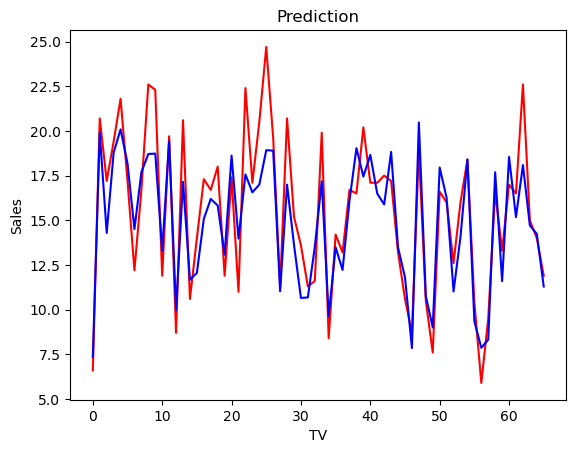

In [27]:
# Plotting the actual and predicted values    
c = [i for i in range (len(Y_test))]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,Y_pred,color='b',linestyle='-')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [28]:
# Regularisation technique- Ridge
from sklearn.linear_model import Ridge

In [29]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge()

In [30]:
# Coefficient 
print(ridge.coef_)

[0.05444328]


In [31]:
# Print the intercept
print(ridge.intercept_)

6.92850742545377


In [32]:
# See the predicted values
ridge_pred = ridge.predict(X_test)

In [33]:
ridge_pred

array([ 7.35316501, 19.89689679, 14.28923892, 18.78080954, 20.08744827,
       18.18737779, 14.50701204, 17.68649961, 18.71003328, 18.73181059,
       13.30925987, 19.42324025,  9.98821978, 17.15295546, 11.67596147,
       12.05706443, 15.07866648, 16.19475373, 15.82998375, 13.07515377,
       18.6174797 , 13.97346789, 17.56672439, 16.56496803, 16.99506995,
       18.92236207, 18.89514043, 11.02808643, 16.99506995, 13.63047523,
       10.6524278 , 10.68509376, 13.51614434, 17.18562143,  9.65067144,
       13.4889227 , 12.22039427, 16.09675582, 19.03669296, 17.44694917,
       18.65559   , 16.49419177, 15.88442703, 18.82436417, 13.47258971,
       11.81206967,  7.84859886, 20.47399556, 10.77220301,  9.00824073,
       17.95327168, 16.25464134, 11.01719777, 14.06602147, 18.39970658,
        9.3512334 ,  7.86493185,  8.3222554 , 17.68649961, 11.59429655,
       18.54670344, 15.17666439, 18.08937988, 14.70845218, 14.24023997,
       11.2948585 ])

In [34]:
# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,ridge_pred))
print('MAE:', mean_absolute_error( Y_test,ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,ridge_pred)))

MSE: 4.125423783342005
MAE: 1.6331545407059391
RMSE: 2.031113926726417


In [35]:
# R square
from sklearn.metrics import r2_score
score = r2_score(Y_test, ridge_pred)
print(score)

0.781527901459215


In [36]:
# Regularisation technique- Lasso
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso()

In [38]:
# Prediction for data set
lasso_pred = lasso.predict(X_test)

In [39]:
lasso_pred

array([ 7.36892697, 19.88664571, 14.29061693, 18.772873  , 20.07680203,
       18.18067189, 14.50793844, 17.68083243, 18.70224351, 18.72397566,
       13.31267016, 19.41397144,  9.99851719, 17.14839474, 11.68275886,
       12.0630715 , 15.07840739, 16.19218011, 15.82816659, 13.07904954,
       18.60988187, 13.97550075, 17.5613056 , 16.56162667, 16.99083665,
       18.91413197, 18.88696679, 11.03622738, 16.99083665, 13.63321938,
       10.66134778, 10.69394601, 13.51912559, 17.18099296,  9.66166886,
       13.4919604 , 12.22606263, 16.09438543, 19.02822577, 17.44177877,
       18.64791313, 16.49099718, 15.88249697, 18.8163373 , 13.47566129,
       11.8185848 ,  7.86333339, 20.4625477 , 10.78087461,  9.02057041,
       17.94705127, 16.25194353, 11.02536131, 14.06786239, 18.39256036,
        9.36285179,  7.87963251,  8.33600767, 17.68083243, 11.6012633 ,
       18.53925238, 15.17620207, 18.08287721, 14.70896083, 14.2417196 ,
       11.30244623])

In [40]:
# Performance metrics
print('MSE:',mean_squared_error( Y_test,lasso_pred))
print('MAE:', mean_absolute_error( Y_test,lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,lasso_pred)))

MSE: 4.130555307783671
MAE: 1.63382567986779
RMSE: 2.03237676324634


In [41]:
score = r2_score(Y_test, lasso_pred)
print(score)

0.7812561487927349


In [42]:
lasso.score(X_train, Y_train)

0.818352839220139

In [43]:
# Regularisation technique- ElasticNet
from sklearn.linear_model import ElasticNet

In [44]:
elastic = ElasticNet()
elastic.fit(X_train,Y_train)

ElasticNet()

In [45]:
# Printing coefficient
print(elastic.coef_)

[0.05438378]


In [46]:
elastic.score(X_train,Y_train)

0.8183553825436057

In [47]:
elastic.score(X_test,Y_test)

0.7813854029842571